## Part 3: Exploratory Data Analysis

**In this notebook,** I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.

Importing the required libraries:

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

## for geospatial
import folium
import geopy
from mpl_toolkits.basemap import Basemap

## for machine learning
from sklearn import preprocessing, cluster

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline

#### Importing the saved clean earthquake data, and doing some house-keeping on the dataframe.

In [2]:
file_path = "../datasets/" + "combined_eq_california" + "_timeseries" + ".csv"

#Converting to time-series with respect to "time" column
df_eq = pd.read_csv(file_path, index_col=0)

df_eq["time"] = df_eq.index

df_eq.head(3)

,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name,time
time,,,,,,,,,,,,,,,,,
1970-01-02 10:45:20.570,earthquake,3.14,"24km S of Santa Barbara, CA",reviewed,0,152,ci,11.000000,0.234700,0.590000,205.000000,ml,-119.695667,34.206000,6.000000,M: 3.14 / 1970-01-02 / 24km S of Santa Barbar...,1970-01-02 10:45:20.570
1970-01-02 21:47:53.740,earthquake,2.61,"12km NE of Inyokern, CA",reviewed,0,105,ci,6.000000,0.136800,0.730000,96.000000,ml,-117.733667,35.735167,1.650000,"M: 2.61 / 1970-01-02 / 12km NE of Inyokern, CA",1970-01-02 21:47:53.740
1970-01-03 02:51:58.400,earthquake,4.00,"San Francisco Bay area, California",reviewed,0,246,ushis,20.500989,0.198006,0.197771,121.016289,mb,-122.088000,37.298000,6.274206,"M: 4.0 / 1970-01-03 / San Francisco Bay area,...",1970-01-03 02:51:58.400


## How many large earthquakes (M>6) happened in last 50 years?

In [3]:
df_eq_large = df_eq[df_eq["mag"]>6].copy()

# Fixing the time column datatype
df_eq_large["time"] = pd.to_datetime(df_eq_large["time"])

df_eq_large["time_diff_day"] = df_eq_large["time"].diff()

df_eq_large.head(2)

,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name,time,time_diff_day
time,,,,,,,,,,,,,,,,,,
1971-02-09 14:00:41.920,earthquake,6.6,"10km SSW of Agua Dulce, CA",reviewed,0,1560,ci,0.000000,0.198006,0.249000,123.400000,mw,-118.370,34.416,8.95,"M: 6.6 / 1971-02-09 / 10km SSW of Agua Dulce, CA",1971-02-09 14:00:41.920,NaT
1971-09-30 08:18:00.000,earthquake,6.5,Gulf of California,automatic,0,650,iscgem,20.500989,0.198006,0.197771,121.016289,mw,-110.834,26.816,15.00,M: 6.5 / 1971-09-30 / Gulf of California,1971-09-30 08:18:00.000,232 days 18:17:18.080000


## 85 Large earthquakes (M>6)!

# What happened 30 days ahead of 1989 Loma Prieta earthquake ?

In [4]:
df_eq_lp = df_eq['1989-09-19':'1989-10-19']

df_eq_lp.head(2)

,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth,name,time
time,,,,,,,,,,,,,,,,,
1989-09-19 02:49:47.290,earthquake,2.30,"17km E of Desert Hot Springs, CA",reviewed,0,81,ci,0.0,0.198006,0.054,70.0,mc,-116.316,33.971,7.935,M: 2.3 / 1989-09-19 / 17km E of Desert Hot Sp...,1989-09-19 02:49:47.290
1989-09-19 03:03:33.230,earthquake,2.79,"12km ESE of Anza, CA",reviewed,0,120,ci,0.0,0.198006,0.109,39.8,ml,-116.557,33.517,12.388,"M: 2.79 / 1989-09-19 / 12km ESE of Anza, CA",1989-09-19 03:03:33.230


/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


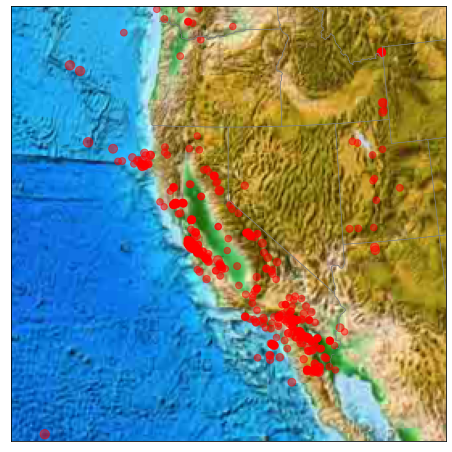

In [5]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=38, lon_0=-120,
            width=2.0E6, height=2.0E6)

# m.bluemarble()
m.etopo()


# m.drawcoastlines(color='blue',linewidth=3)
# m.drawcountries(color='gray',linewidth=3)
m.drawstates(color='gray')


lon = list(df_eq_lp["longitude"])
lat = list(df_eq_lp["latitude"])

m.scatter(lon,lat, latlon=True,
#           c=color,
          s=df_eq_lp['mag']/0.05,
          c = 'red',
#           cmap='YlGnBu_r',
          alpha=0.5)

# df_eq_large.plot(kind="scatter", x="longitude", y="latitude",
#     s=df_eq_large['mag']/0.05, label="Large EQ",
#     alpha=0.4, figsize=(10,7), ax = ax
# )



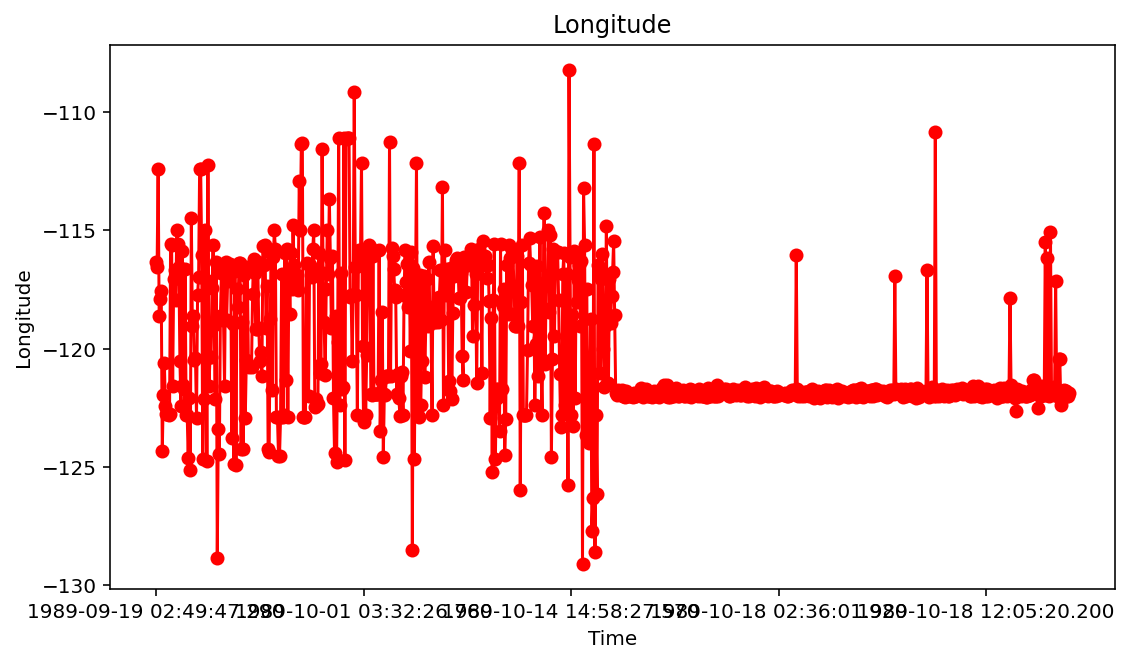

In [6]:
%config InlineBackend.figure_format = 'retina'


# Pandas series with magnitudes greater than 6
plt.figure(figsize=(9,5))
df_eq_lp["longitude"].plot(style="ro-")

plt.title("Longitude")
plt.xlabel('Time')
plt.ylabel("Longitude");

# Clustering:

DBSCAN(eps=0.35, min_samples=11)
Total number of points: 881
Estimated number of clusters: 4
Estimated number of noise points: 162
Silhouette Coefficient: 0.257
Clusters:  {1: 471, 0: 182, -1: 162, 2: 43, 3: 23}
Top cluster is:  1


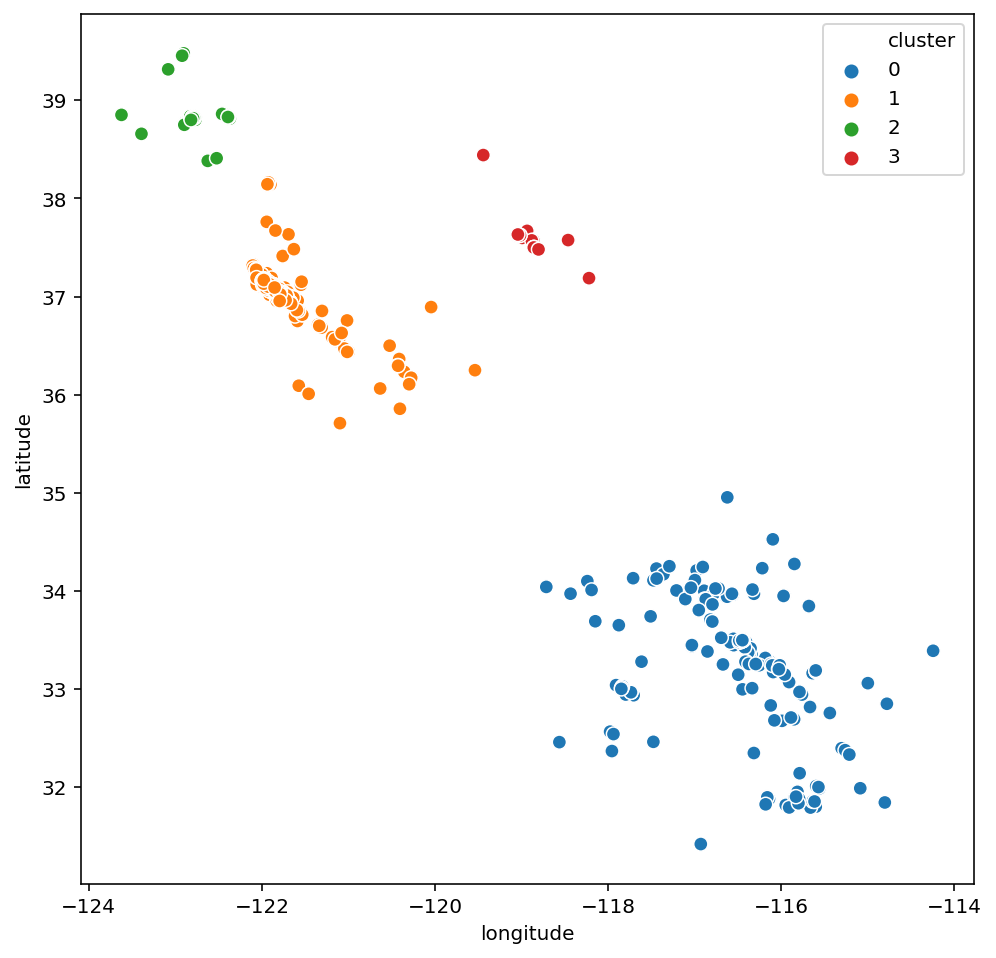

In [21]:
#Creating the df for creating the clusters


df = df_eq_lp.loc[:,["longitude", "latitude", "depth"]]

ss = StandardScaler()
X_scaled = ss.fit_transform(df)

eps_param = 0.35
min_sample = 11

dbscan = DBSCAN(eps = eps_param, min_samples=min_sample)

db = dbscan.fit(X_scaled)

print(db)

df['cluster'] = db.labels_


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Total number of points: %d' % len(X_scaled))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, labels))

cluster_dict = dict(
                zip(
                    df.cluster.value_counts().keys(),
                    df.cluster.value_counts().values
                       )
                   ) 
print("Clusters: ", cluster_dict)

Top_clusters = df.cluster.value_counts().keys()


# Plotting the top cluster
if (Top_clusters[0] < 0):
    cluster_mask = Top_clusters[1]
else:
    cluster_mask = Top_clusters[0]

print("Top cluster is: ", cluster_mask)

dbb = db.core_sample_indices_



plt.figure(figsize=(8,8))

sns.scatterplot(data = df[df["cluster"]!=-1], x = "longitude", y = "latitude", 
                hue = "cluster", 
                s = 50,
                palette="tab10", legend = "full")


plt.legend(loc='upper right')


In [8]:
Top_clusters

Int64Index([1, 0, -1, 2, 3], dtype='int64')

In [9]:
df["cluster"].value_counts()

 1    471
 0    182
-1    162
 2     43
 3     23
Name: cluster, dtype: int64

/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleand

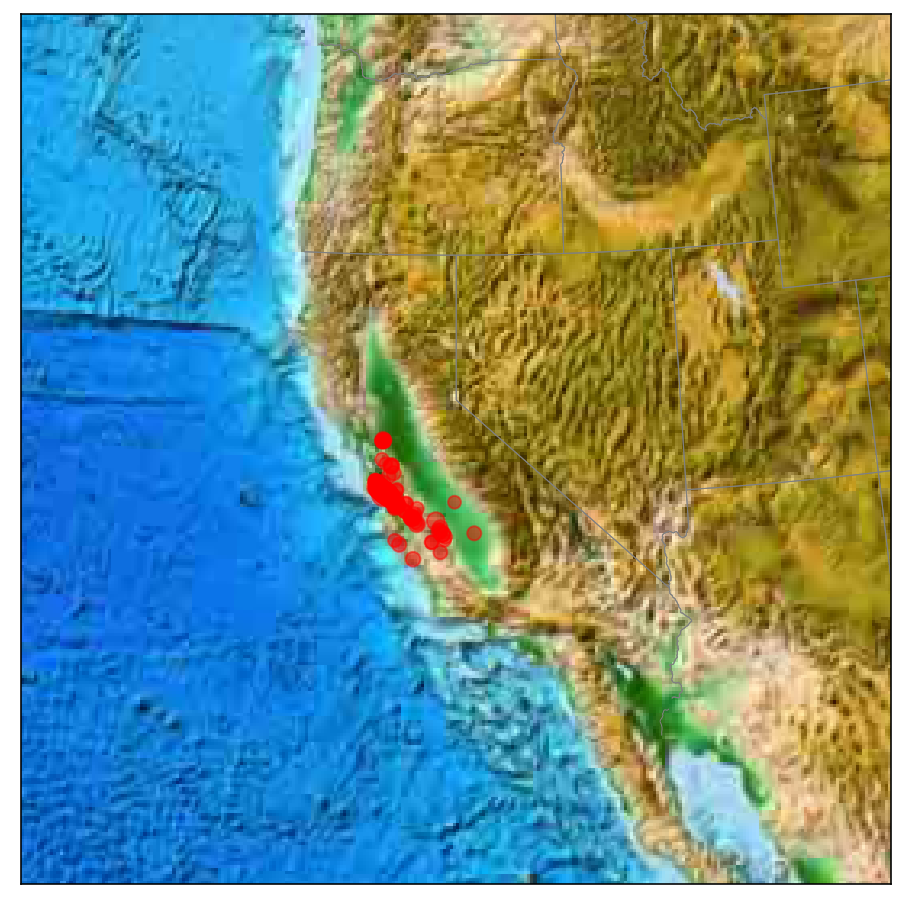

In [10]:


df_eq_lp["cluster"] = df['cluster']

df_top_cluster = df_eq_lp[df_eq_lp["cluster"] == cluster_mask]

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=38, lon_0=-120,
            width=2.0E6, height=2.0E6)

m.etopo()

m.drawstates(color='gray')


lon = list(df_top_cluster["longitude"])
lat = list(df_top_cluster["latitude"])

m.scatter(lon,lat, latlon=True,
#           c=color,
          s=df_top_cluster['mag']/0.05,
          c = 'red',
#           cmap='YlGnBu_r',
          alpha=0.5)



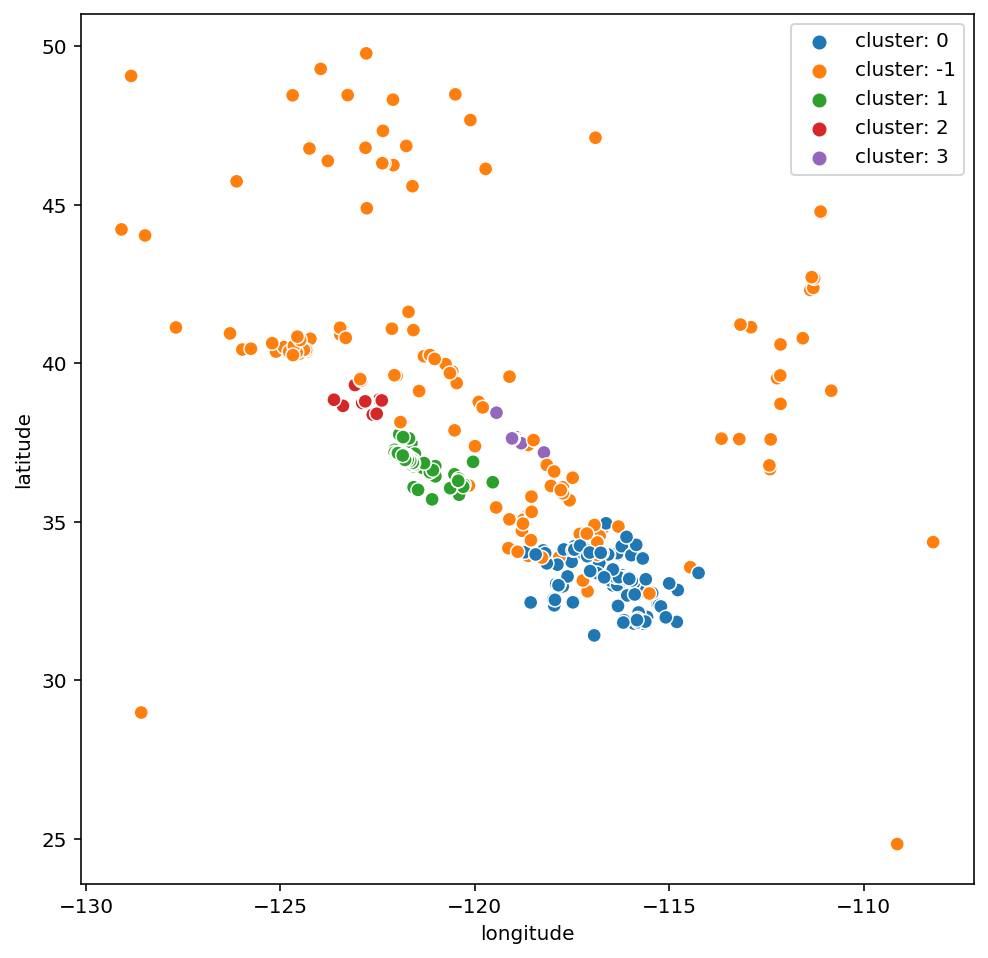

In [11]:
plt.figure(figsize=(8,8))

sns.scatterplot(data = df, x = "longitude", y = "latitude", 
                hue = ["cluster: {}".format(x) for x in labels], 
                s = 50,
                palette="tab10", legend = "full")


plt.legend(loc='upper right')

In [12]:
df[df["cluster"]!=-1]["cluster"].unique()

array([0, 1, 2, 3])

In [13]:
eps_param

0.35

# Elbow curve

0.634428187491766


<Figure size 360x360 with 0 Axes>

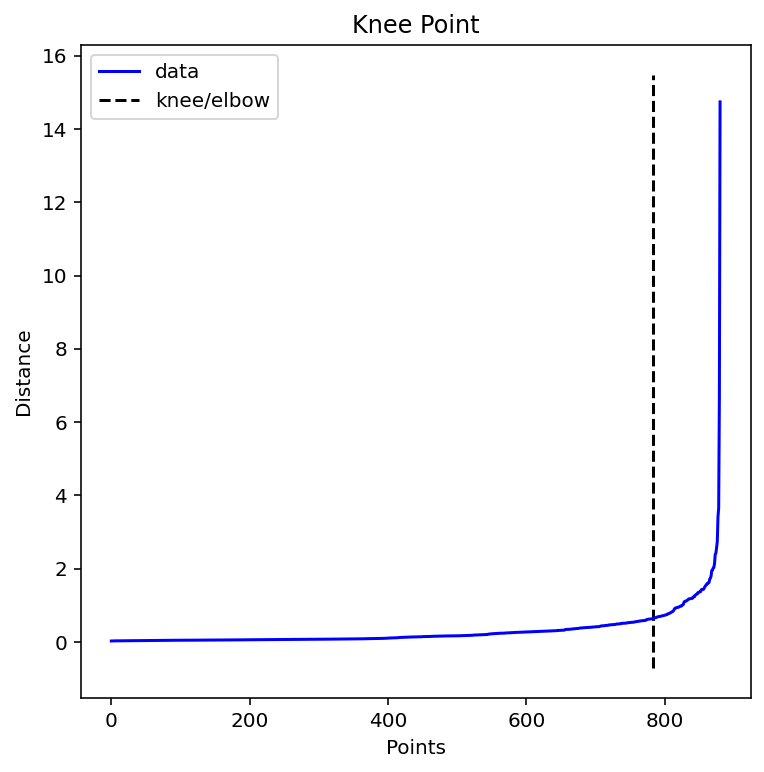

In [19]:
#Source: https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_sample)

neighbors = nearest_neighbors.fit(X_scaled)

distances, indices = neighbors.kneighbors(X_scaled)

distances = np.sort(distances[:,min_sample-1], axis=0)


from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])


## elbow around 0.5

In [15]:
print("Hello World!")

Hello World!
